In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,ensemble
from sklearn.model_selection import train_test_split

In [ ]:
def load_data_regression():
    '''
    載入用於迴歸問題的資料集

    :return: 一個元組，用於迴歸問題。元組元素依次為：訓練樣本集、測試樣本集、訓練樣本集對應的值、測試樣本集對應的值
    '''
    diabetes = datasets.load_diabetes() #使用 scikit-learn 自帶的一個糖尿病病人的資料集
    return train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0) # 拆分成訓練集和測試集，測試集大小為原始資料集大小的 1/4

In [ ]:
def test_RandomForestRegressor(*data):
    '''
    測試 RandomForestRegressor 的用法

    :param data:  可變引數。它是一個元組，這裡要求其元素依次為：訓練樣本集、測試樣本集、訓練樣本的值、測試樣本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    regr=ensemble.RandomForestRegressor()
    regr.fit(X_train,y_train)
    print("Traing Score:%f"%regr.score(X_train,y_train))
    print("Testing Score:%f"%regr.score(X_test,y_test))

In [ ]:
def test_RandomForestRegressor_num(*data):
    '''
    測試 RandomForestRegressor 的預測效能隨  n_estimators 引數的影響

    :param data: 可變引數。它是一個元組，這裡要求其元素依次為：訓練樣本集、測試樣本集、訓練樣本的值、測試樣本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.RandomForestRegressor(n_estimators=num)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(nums,training_scores,label="Training Score")
    ax.plot(nums,testing_scores,label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(-1,1)
    plt.suptitle("RandomForestRegressor")
    # 設定 X 軸的網格線，風格為 點畫線
    plt.grid(axis='x',linestyle='-.')
    plt.show()

In [ ]:
def test_RandomForestRegressor_max_depth(*data):
    '''
    測試 RandomForestRegressor 的預測效能隨  max_depth 引數的影響

    :param data:  可變引數。它是一個元組，這裡要求其元素依次為：訓練樣本集、測試樣本集、訓練樣本的值、測試樣本的值
    :return:  None
    '''
    X_train,X_test,y_train,y_test=data
    maxdepths=range(1,20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_depth in maxdepths:
        regr=ensemble.RandomForestRegressor(max_depth=max_depth)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(maxdepths,training_scores,label="Training Score")
    ax.plot(maxdepths,testing_scores,label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    # 設定 X 軸的網格線，風格為 點畫線
    plt.grid(axis='x',linestyle='-.')
    plt.show()

In [ ]:
def test_RandomForestRegressor_max_features(*data):
    '''
   測試 RandomForestRegressor 的預測效能隨  max_features 引數的影響

    :param data:  可變引數。它是一個元組，這裡要求其元素依次為：訓練樣本集、測試樣本集、訓練樣本的值、測試樣本的值
    :return: None
    '''
    X_train,X_test,y_train,y_test=data
    max_features=np.linspace(0.01,1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for max_feature in max_features:
        regr=ensemble.RandomForestRegressor(max_features=max_feature)
        regr.fit(X_train,y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))
    ax.plot(max_features,training_scores,label="Training Score")
    ax.plot(max_features,testing_scores,label="Testing Score")
    ax.set_xlabel("max_feature")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestRegressor")
    # 設定 X 軸的網格線，風格為 點畫線
    plt.grid(axis='x',linestyle='-.')
    plt.show()

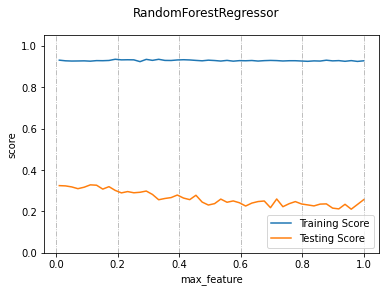

In [ ]:
if __name__=='__main__':
    X_train,X_test,y_train,y_test=load_data_regression() # 獲取迴歸資料
#    test_RandomForestRegressor(X_train,X_test,y_train,y_test) # 呼叫 test_RandomForestRegressor
#    test_RandomForestRegressor_num(X_train,X_test,y_train,y_test) # 呼叫 test_RandomForestRegressor_num
#    test_RandomForestRegressor_max_depth(X_train,X_test,y_train,y_test) # 呼叫 test_RandomForestRegressor_max_depth
    test_RandomForestRegressor_max_features(X_train,X_test,y_train,y_test) # 呼叫 test_RandomForestRegressor_max_features